#### **1.IMPORTING DATA & DATA WRANGLING/CLEANING**

In [3]:
#importing libraries for data processing and basic analysis.
import pandas as pd
import numpy as np

[1 2 3 4 5] <class 'numpy.ndarray'>


In [4]:
#Importing Data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
#Storing the data in a variable.
raw_df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Projects/Iris.csv')

In [6]:
raw_df  #the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
#basic data analysis
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##### INFERENCES
* There are total 150 entries spreaded over 6 columns:
    a.Id --- an irrelevant column
    b.SepalLengthCm
    c.SepalWidthCm
    d.PetalLengthCm
    e.PetalWidthCm
    f.Species

* There are no null values in any of the columns.
* Except for the Species column, which is a categoric column, all other columns are numeric.

### **2.EDA AND DATA VISUALIZATION**

##### **EDA**

In [8]:
#statistical analysis
raw_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
#Checking for duplicates
raw_df[raw_df.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [40]:
#Checking missing values.
raw_df.isnull().sum(axis=0)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
#Checking for balance across classes.
raw_df["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [43]:
#Checking central tendency of each species.
raw_df.groupby("Species").agg(["mean", "median"])

Id        SepalLengthCm  ... PetalLengthCm PetalWidthCm       
                  mean median          mean  ...        median         mean median
Species                                      ...                                  
Iris-setosa       25.5   25.5         5.006  ...          1.50        0.244    0.2
Iris-versicolor   75.5   75.5         5.936  ...          4.35        1.326    1.3
Iris-virginica   125.5  125.5         6.588  ...          5.55        2.026    2.0

[3 rows x 10 columns]

##### **INSIGHTS FROM EDA**


* We get to know mean, median, mode and standard deviations for the numeric columns.
* There were no duplicates in the data.
* No missing values.
*The data is well balanced as every class has 50 entries.

##### **DATA VISUALIZATION**

In [15]:
#Imports for Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


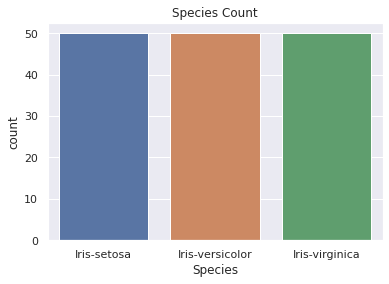

In [17]:
#Species count
plt.title('Species Count')
sns.countplot(raw_df["Species"])

###### **UNIVARIATE ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


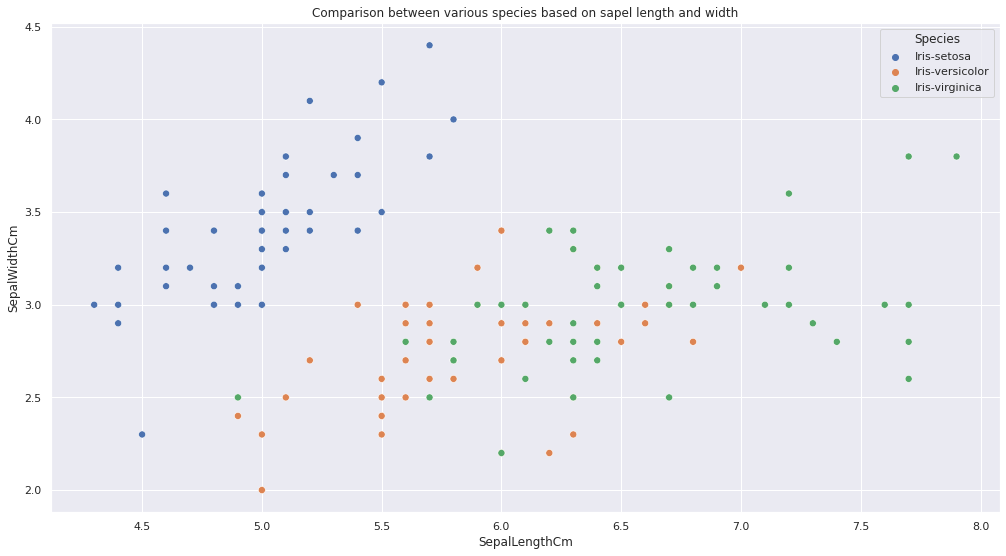

In [20]:
#Scatterplot : Species-vs-SepalParamatersCm
plt.figure(figsize=(17,9))
plt.title("Comparison between various species based on sapel length and width")
sns.scatterplot(raw_df["SepalLengthCm"], raw_df["SepalWidthCm"],hue =raw_df["Species"],s=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


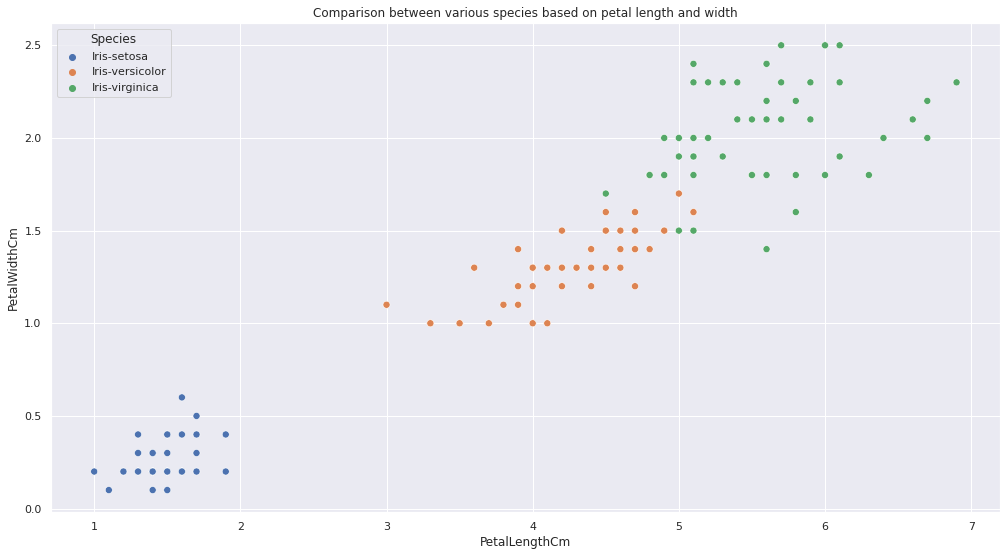

In [23]:
#Scatterplot : Species-vs-PetalParamatersCm
plt.figure(figsize=(17,9))
plt.title("Comparison between various species based on petal length and width")
sns.scatterplot(raw_df["PetalLengthCm"],raw_df["PetalWidthCm"],hue =raw_df["Species"],s=50)

###### **BIVARIATE ANALYSIS**

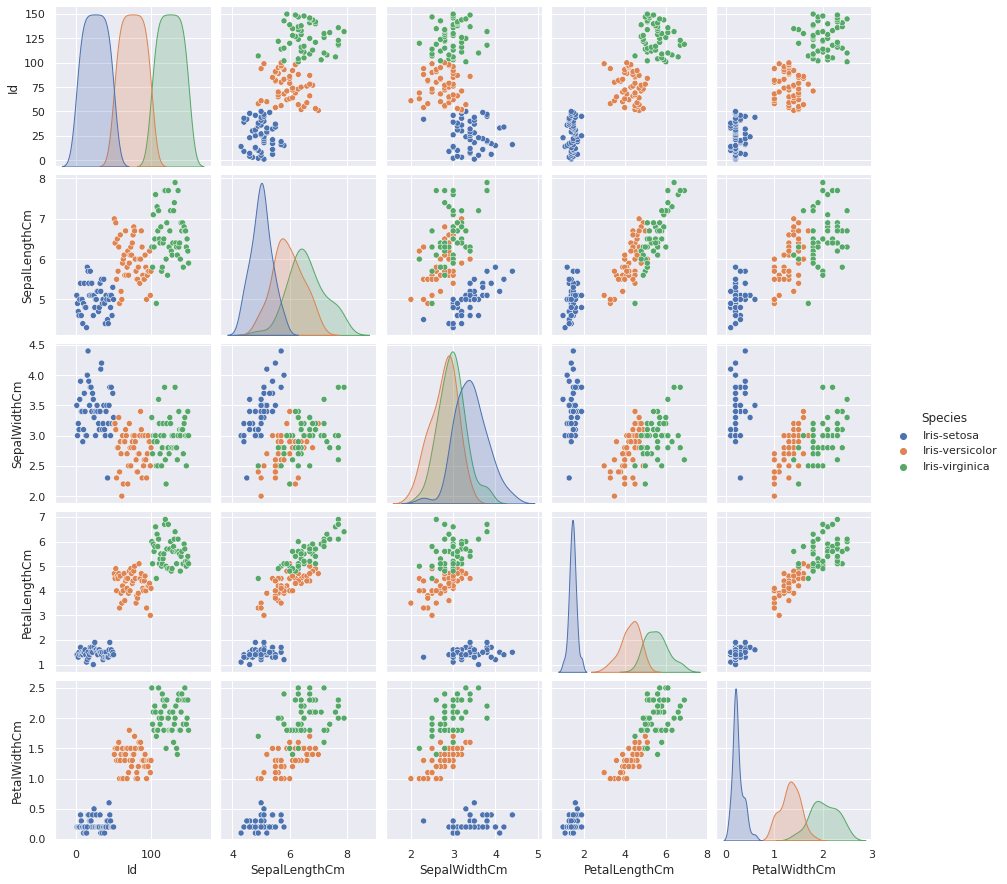

In [25]:
#Pairplots
sns.pairplot(raw_df, hue="Species")

[]

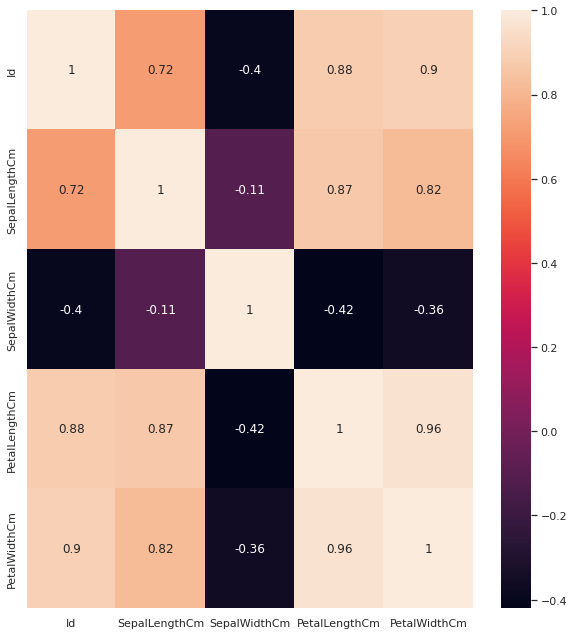

In [27]:
#Heatmap : To check co-relation among various numeric features.
plt.figure(figsize=(10,11))
sns.heatmap(raw_df.corr(),annot=True)
plt.plot()

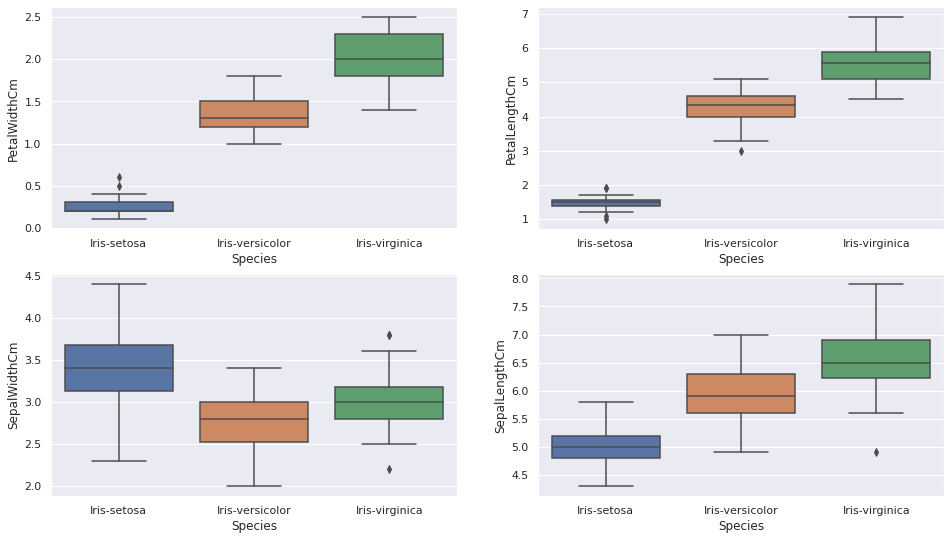

In [34]:
# Box plots : plots to know about distribution of Species with other parameters.
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( x=  "Species", y= "PetalWidthCm" , data = raw_df, orient="v" , ax=axes[0, 0])
sns.boxplot( x=  "Species", y= "PetalLengthCm" , data = raw_df, orient="v" , ax=axes[0, 1])
sns.boxplot( x=  "Species", y= "SepalWidthCm" , data = raw_df, orient="v" , ax=axes[1, 0])
sns.boxplot( x=  "Species", y= "SepalLengthCm" , data = raw_df, orient="v" , ax=axes[1, 1])
plt.show()


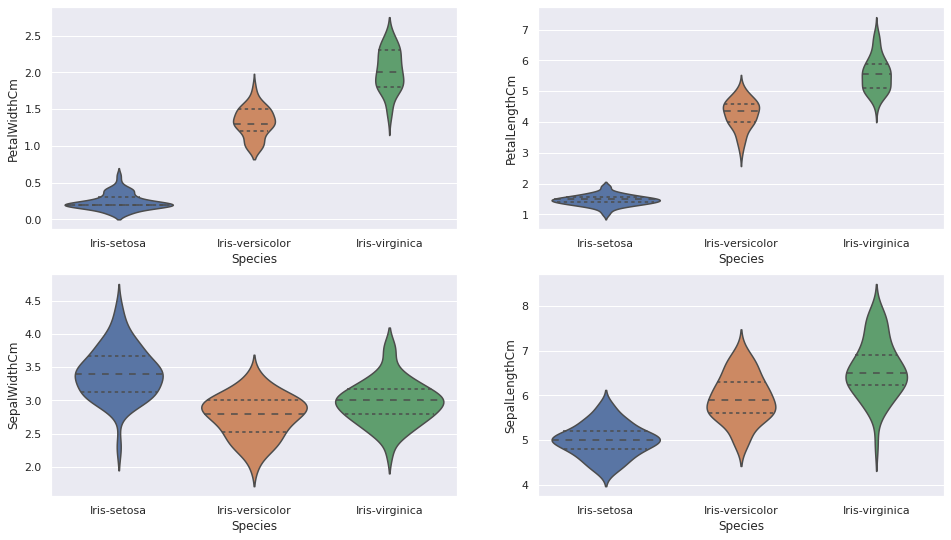

In [36]:
# Violin Plots : plots to know about distribution of Species with other parameters.
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot( x=  "Species", y= "PetalWidthCm" , data = raw_df, orient="v" , ax=axes[0, 0], inner ="quartile")
sns.violinplot( x=  "Species", y= "PetalLengthCm" , data = raw_df, orient="v" , ax=axes[0, 1],inner ="quartile")
sns.violinplot( x=  "Species", y= "SepalWidthCm" , data = raw_df, orient="v" , ax=axes[1, 0],inner ="quartile")
sns.violinplot( x=  "Species", y= "SepalLengthCm" , data = raw_df, orient="v" , ax=axes[1, 1],inner ="quartile")
plt.show()


###### **HISTOGRAMS and PDF**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

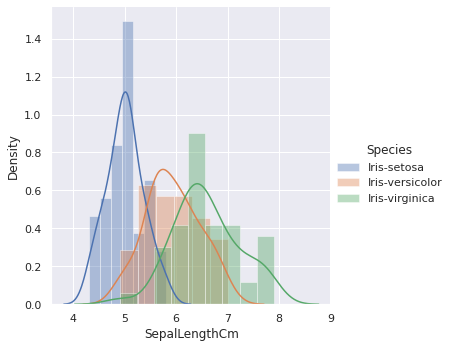

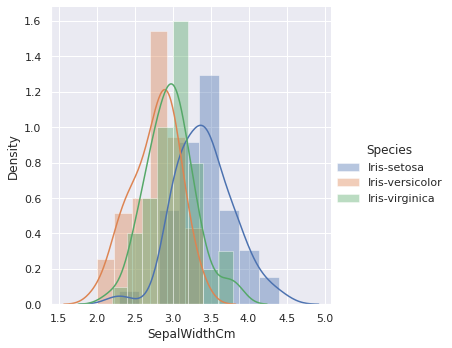

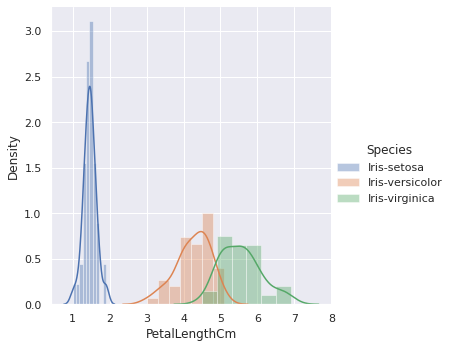

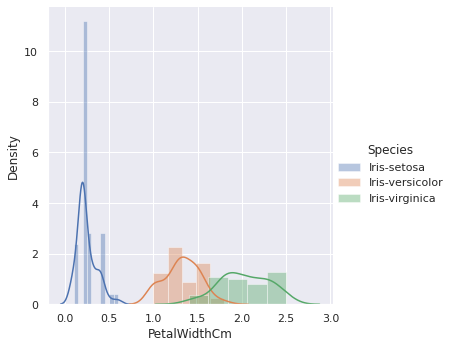

In [39]:
sns.FacetGrid(raw_df, hue="Species", height=5) \
.map(sns.distplot, "SepalLengthCm") \
.add_legend()
sns.FacetGrid(raw_df, hue="Species", height=5) \
.map(sns.distplot, "SepalWidthCm") \
.add_legend()
sns.FacetGrid(raw_df, hue="Species", height=5) \
.map(sns.distplot, "PetalLengthCm") \
.add_legend()
sns.FacetGrid(raw_df, hue="Species", height=5) \
.map(sns.distplot, "PetalWidthCm") \
.add_legend()
plt.show()

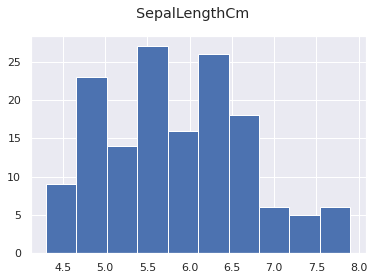

In [ ]:
# Histogram for sepal length.
col1 = 'SepalLengthCm'
raw_df[col1].hist()
plt.suptitle(col1)
plt.show()

<function matplotlib.pyplot.show>

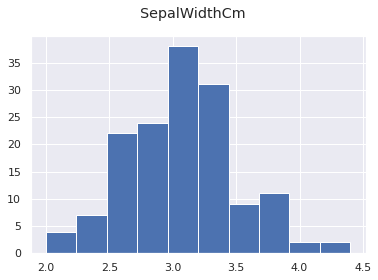

In [ ]:
# Histogram for sepal width.
col2 = 'SepalWidthCm'
raw_df[col2].hist()
plt.suptitle(col2)
plt.show

<function matplotlib.pyplot.show>

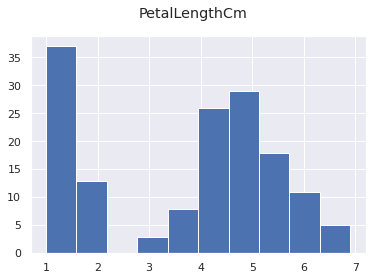

In [ ]:
# Histogram for petal length.
col3 = 'PetalLengthCm'
raw_df[col3].hist()
plt.suptitle(col3)
plt.show

<function matplotlib.pyplot.show>

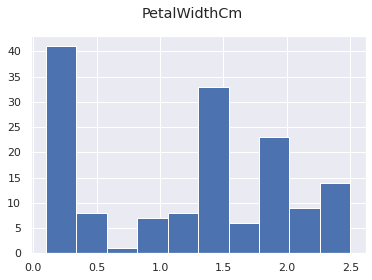

In [ ]:
# Histogram for petal width.
col4 = 'PetalWidthCm'
raw_df[col4].hist()
plt.suptitle(col4)
plt.show

##### **INSIGHTS FROM DATA VISUALIZATION**





1. From Univariate Analysis
* Setosa species have the smallest petal length as well as petal width
* Versicolor species have average petal length and petal width
* Virginica species have the highest petal length as well as petal width

2. From Bivariate analysis

**A. Heatmap**
* High co relation between petal length and width columns.
* Setosa has both low petal length and width
* Versicolor has both average petal length and width
* Virginica has both high petal length and width.
* Sepal width for setosa is high and length is low.
* Versicolor have average values for for sepal dimensions.
* Virginica has small width but large sepal length
* Sepal Length and Sepal Width features are slightly correlated with each other.

**B. BOX Plots**
* Setosa is having smaller feature and less distributed
* Versicolor is distributed in a average manner and average features
* Virginica is highly distributed with large no .of values and features
* Clearly the mean/ median values are being shown by each plots for various features(sepal length & width, petal length & width)

**C. Violin Plots**
* Setosa is having less distribution and density in case of petal length & width
* Versicolor is distributed in a average manner and average features in case of petal length & width
* Virginica is highly distributed with large no .of values and features in case of sepal length & width
* High density values are depicting the mean/median values, for example: Iris * Setosa has highest density at 5.0 cm ( sepal length feature) which is also the median value(5.0) as per the table

**D. Histrograms and PDFs**
* Plot 1 shows that there is a significant amount of overlap between the species on sepal length, so it is not an effective Classification feature
* Plot 2 shows that there is even higher overlap between the species on sepal width, so it is not an effective Classification feature
* Plot 3 shows that petal length is a good Classification feature as it clearly separates the species . The overlap is extremely less (between Versicolor and Virginica) , Setosa is well separated from the rest two
* Just like Plot 3, Plot 4 also shows that petal width is a good Classification feature . The overlap is significantly less (between Versicolor and Virginica) , Setosa is well separated from the rest two.

** ***From PLOT3*** **

* The pdf curve of Iris Setosa ends roughly at 2.1
* If petal length < 2.1, then species is Iris Setosa
* The point of intersection between pdf curves of Versicolor and Virginica is roughly at 4.8
* If petal length > 2.1 and petal length < 4.8 then species is Iris Versicolor
* If petal length > 4.8 then species is Iris Virginica

### **3.DATA PREPROCESSING**

In [ ]:
del raw_df['Id']

In [ ]:
raw_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
codes = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
raw_df["Species"] = raw_df["Species"].map(codes)

In [ ]:
raw_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### **4.MODELLING AND EVALUATION**

##### **4.0.I/O-Split and Train-Test-Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = raw_df.iloc[:, :-1]
y = raw_df.iloc[:, -1]

In [ ]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
34,4.9,3.1,1.5,0.1
98,5.1,2.5,3.0,1.1
47,4.6,3.2,1.4,0.2
4,5.0,3.6,1.4,0.2
27,5.2,3.5,1.5,0.2
...,...,...,...,...
133,6.3,2.8,5.1,1.5
71,6.1,2.8,4.0,1.3
15,5.7,4.4,1.5,0.4
66,5.6,3.0,4.5,1.5


In [ ]:
y_train

34     0
98     1
47     0
4      0
27     0
      ..
133    2
71     1
15     0
66     1
142    2
Name: Species, Length: 120, dtype: int64

In [ ]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
120,6.9,3.2,5.7,2.3
9,4.9,3.1,1.5,0.1
97,6.2,2.9,4.3,1.3
109,7.2,3.6,6.1,2.5
123,6.3,2.7,4.9,1.8
82,5.8,2.7,3.9,1.2
35,5.0,3.2,1.2,0.2
14,5.8,4.0,1.2,0.2
114,5.8,2.8,5.1,2.4
143,6.8,3.2,5.9,2.3


In [ ]:
y_test

120    2
9      0
97     1
109    2
123    2
82     1
35     0
14     0
114    2
143    2
83     1
124    2
93     1
105    2
79     1
60     1
24     0
49     0
110    2
52     1
119    2
57     1
28     0
64     1
31     0
121    2
145    2
3      0
67     1
42     0
Name: Species, dtype: int64

##### **4.1.Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



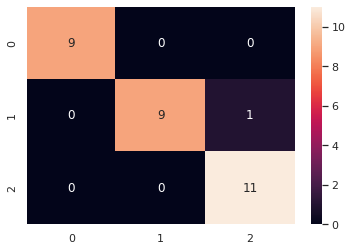

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

##### **4.2.K-Nearest Neighbours(KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier2 = KNeighborsClassifier(n_neighbors=8)
classifier2.fit(X_train, y_train)

y_pred2 = classifier2.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred2))

0.9666666666666667


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



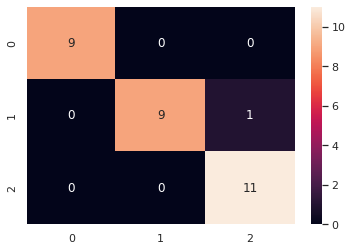

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True)

##### **4.3.Support Vector Machines(SVM)**

In [ ]:
from sklearn.svm import SVC

classifier3 = SVC()
classifier3.fit(X_train, y_train)

y_pred3 = classifier3.predict(X_test)

In [ ]:
print('accuracy is',accuracy_score(y_test,y_pred3))

accuracy is 0.9333333333333333


In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      0.90      0.90        10
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



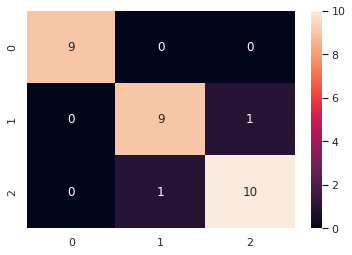

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred3),annot=True)

##### **4.4.Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier4 = DecisionTreeClassifier()

classifier4.fit(X_train, y_train)

y_pred4 = classifier4.predict(X_test)

In [ ]:
print('accuracy is',accuracy_score(y_test,y_pred4))

accuracy is 0.9333333333333333


In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      0.90      0.90        10
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



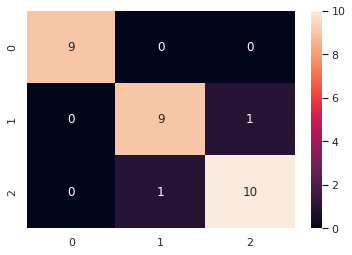

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred4),annot=True)

##### **4.5.Gaussian Naive Byes(GNB)**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)

y_pred5 = classifier5.predict(X_test)

In [ ]:
print('accuracy is',accuracy_score(y_test,y_pred5))

accuracy is 0.9666666666666667


In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



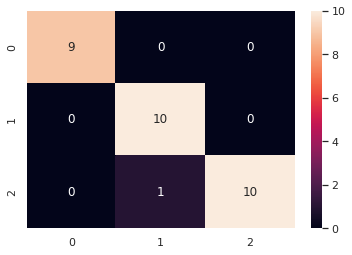

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred5),annot=True)

### **5.COMPARISON AND CONCLUSION**

In [ ]:
x_axis = [accuracy_score(y_test, y_pred),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3),accuracy_score(y_test, y_pred4),accuracy_score(y_test, y_pred5)]

In [ ]:
y_axis = ['Logistic Regression','KNN','SVM','Decison Trees','GNB']

Text(0.5, 1.0, 'Accuracy scores of different Classification Models')

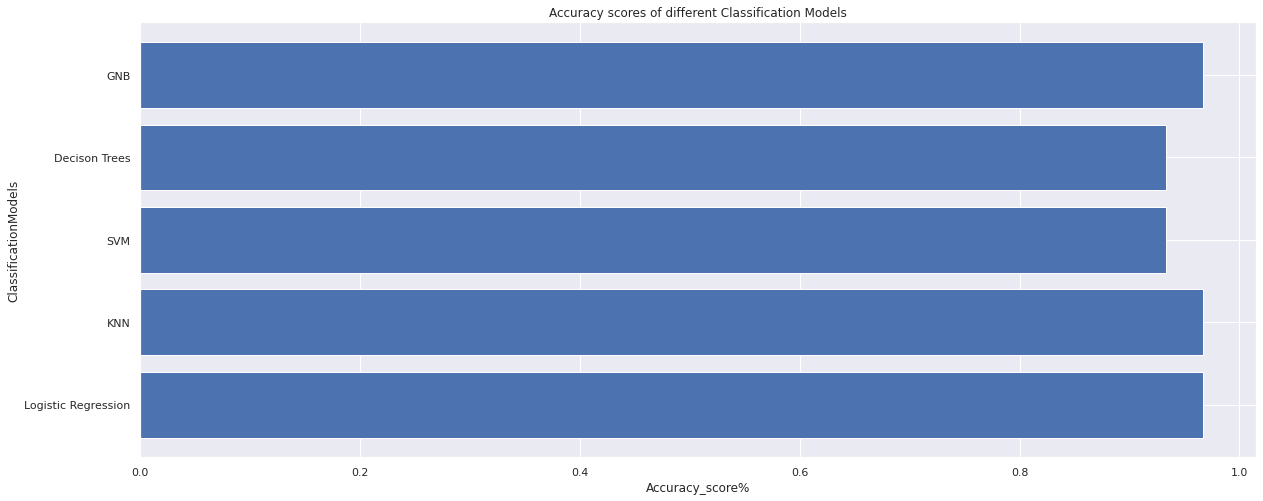

In [ ]:
plt.figure(figsize = (20,8))
plt.barh(y_axis,x_axis)
plt.ylabel("ClassificationModels")
plt.xlabel("Accuracy_score%")
plt.title("Accuracy scores of different Classification Models")

**CONCLUSION**
* Algorithms like Gaussian Naiive Bayes, KNN, and Logistic regression gave almost same acccuracy(097%)
* Decision Tree aND SVM has same accuracy(93%)
* Algorithms, GNB, KNN and LR gave much better results on this dataset as compared to SVM and Decision Trees.